In [269]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
# connected=True means it will download the latest version of plotly javascript library.
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf

In [142]:
app = pd.read_csv('googleplaystore.csv')
user = pd.read_csv('googleplaystore_user_reviews.csv')

In [144]:
app.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3218,Turo - Better Than Car Rental,TRAVEL_AND_LOCAL,4.4,14114,46M,"1,000,000+",Free,0,Everyone,Travel & Local,"August 4, 2018",18.21.0,5.0 and up
4479,G-Pix [Android P] Dark EMUI 8/5 THEME,PERSONALIZATION,4.1,169,24M,"10,000+",Free,0,Everyone,Personalization,"March 25, 2018",7,4.4 and up
9607,PokerStars Play: Free Texas Holdem Poker Game,GAME,4.6,14989,78M,"500,000+",Free,0,Teen,Card,"July 6, 2018",1.9.2,4.0.3 and up
1903,Sweet Fruit Candy,GAME,4.5,197540,29M,"10,000,000+",Free,0,Everyone,Puzzle,"July 16, 2018",79.0,4.1 and up
1589,Caf - My Account,LIFESTYLE,3.9,18961,1.8M,"5,000,000+",Free,0,Everyone,Lifestyle,"September 24, 2015",1.1.1,2.3 and up
6769,BT One Mobile secure access,BUSINESS,3.4,54,5.7M,"10,000+",Free,0,Everyone,Business,"July 28, 2016",3.61,2.3.3 and up
652,PlusOne,DATING,NaN,0,10M,1+,Free,0,Mature 17+,Dating,"July 17, 2018",1.1.1,4.2 and up
3056,"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,4.3,91033,Varies with device,"5,000,000+",Free,0,Everyone,Sports,"August 4, 2018",Varies with device,5.0 and up
8863,Soccer Manager 2018,SPORTS,4.4,63779,95M,"1,000,000+",Free,0,Everyone,Sports,"July 16, 2018",1.5.6,5.0 and up
207,Jobs in Alabama - Jobs in Alba,BUSINESS,4.1,11622,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 26, 2018",Varies with device,Varies with device


In [145]:
# Apps that have null values
app.shape[0] - app.count()[app.count() < app.shape[0]]

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [260]:
# Dropna and dublicates
app.drop_duplicates('App', inplace=True)
app['Rating'].fillna(0, inplace=True)
app.dropna(axis=0, inplace=True)

app.shape[0] - app.count()[app.count() < app.shape[0]]

Series([], dtype: int64)

In [231]:
app.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
797,Learn English with Phrases,EDUCATION,4.2,5695,Varies with device,1000000.0,Free,0,Everyone,Education,"September 28, 2017",Varies with device,Varies with device
821,Socrative Teacher,EDUCATION,3.9,1239,1.8,100000.0,Free,0,Everyone,Education,"July 29, 2016",4.4,3.2
8512,Advanced Download Manager,TOOLS,4.5,569727,Varies with device,10000000.0,Free,0,Everyone,Tools,"November 3, 2017",Varies with device,Varies with device
8890,Dirt Trackin Sprint Cars,GAME,3.8,499,47,10000.0,Paid,$3.99,Everyone,Racing,"May 10, 2018",1.0,5
516,Sudy – Meet Elite & Rich Single,DATING,4.1,17268,40,500000.0,Free,0,Mature 17+,Dating,"June 25, 2018",4.1,4
10177,Farsi Keyboard,TOOLS,4.3,9716,1.3,1000000.0,Free,0,Everyone,Tools,"April 10, 2018",4.7,4
6942,BX Memo,FAMILY,4.3,131,2,5000.0,Free,0,Everyone,Education,"November 17, 2016",3.3,2.2
1809,New YAHTZEE® With Buddies Dice Game,GAME,4.1,42079,93,5000000.0,Free,0,Everyone,Board,"July 5, 2018",5.6,4.1
2728,LivingSocial - Local Deals,SHOPPING,4.1,28523,29,5000000.0,Free,0,Everyone,Shopping,"August 3, 2018",18.10,4.4
1850,Best Fiends - Free Puzzle Game,GAME,4.6,1480189,Varies with device,10000000.0,Free,0,Everyone,Casual,"August 2, 2018",5.8,Varies with device


## Cleaning Data

* remove unit in size and make it number.
* remove '+' in Installs
* readable date format in Last Updated.
* make version readable.
* make android version readable.

In [148]:
app['Size'][app['Size'] != 'Varies with device'] = app['Size'][app['Size'] != 'Varies with device'].apply(
    lambda x: float(x[:-1]) if x[-1] == 'M' else float(x[:-1])/1000 if x[-1] == 'k' else x
)

In [149]:
app['Installs'] = app['Installs'].apply(
    lambda x: float(x[:-1].replace(',', '')) if x[-1] == '+' else x
)

In [150]:
app['Android Ver'][app['Android Ver'] != 'Varies with device'] = app['Android Ver'][app['Android Ver'] != 'Varies with device'].apply(
    lambda x: float(str(x)[0:3])
)

In [232]:
app['Price'] = app['Price'].apply(
    lambda x: float(x.replace('$', ''))
)

In [233]:
app['Reviews'] = app['Reviews'].apply(
    lambda x: float(x.replace('$', ''))
)

In [87]:
app.shape

(9648, 13)

In [88]:
app['Type'].value_counts()

Free    8895
Paid     753
Name: Type, dtype: int64

In [227]:
app['Installs'].value_counts()

1.000000e+06    1416
1.000000e+05    1112
1.000000e+04    1029
1.000000e+07     937
1.000000e+03     886
1.000000e+02     709
5.000000e+06     607
5.000000e+05     504
5.000000e+04     468
5.000000e+03     467
1.000000e+01     384
5.000000e+02     328
5.000000e+01     204
5.000000e+07     202
1.000000e+08     188
5.000000e+00      82
1.000000e+00      67
5.000000e+08      24
1.000000e+09      20
0.000000e+00      14
Name: Installs, dtype: int64

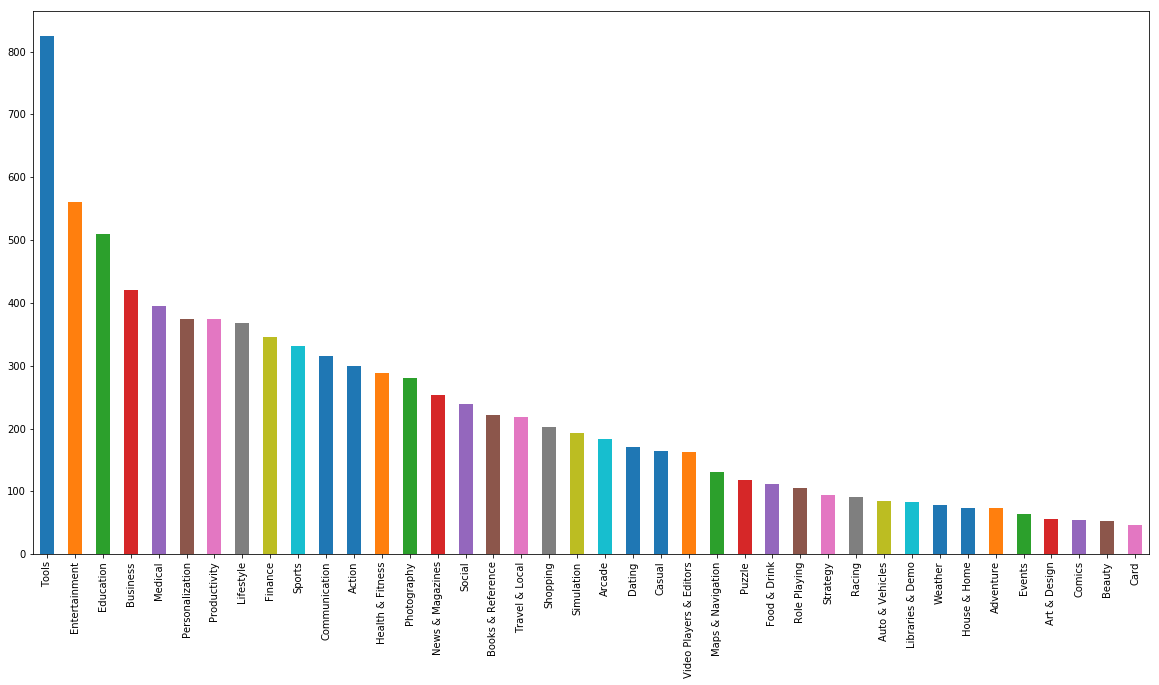

In [256]:
app['Genres'].value_counts()[:40].plot('bar', figsize=(20,10))

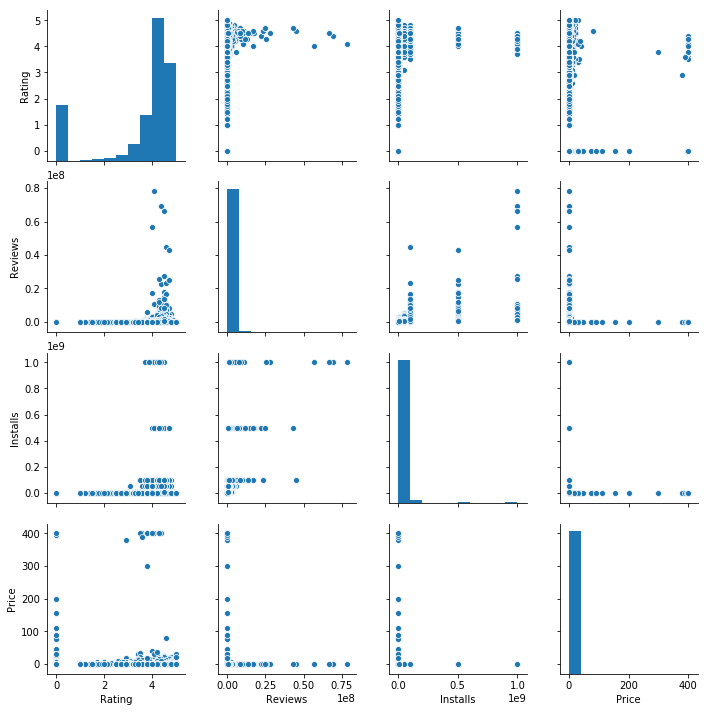

In [264]:
sns.pairplot(app)

In [287]:
apptype = app['Android Ver'].value_counts()

plotly.offline.iplot([
    go.Bar(
        y = apptype.index,
        x = apptype.values,
        orientation = 'h'
    )
], filename='basic_pie_chart')

In [298]:
# plotly.offline.iplot([
#     go.Scatter(
#         x = app['Rating'],
#         y = app['Reviews'],
#         mode = 'markers',
#         marker = dict(
#             size = app['Price']*0.05 + 10
#         )
#     )
# ])

In [301]:
user.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
17449,Branch,"I paid loan early,and denying give loan. You a...",Neutral,0.000000,0.000000
26713,Citizens Bank Mobile Banking,"When I able log in, works fine. It often allow...",Positive,0.416667,0.593750
15391,"Bleacher Report: sports news, scores, & highli...",NaN,NaN,NaN,NaN
42036,FBReader: Favorite Book Reader,"I hated app, I find books I looking for, Jacqu...",Negative,-0.266667,0.433333
56571,Google Photos,When I bought Android phone. I looking gallery...,Positive,0.430000,0.496667
47192,Flipboard: News For Our Time,NaN,NaN,NaN,NaN
35033,Do It Later: Tasks & To-Dos,New items list appear widget anymore,Positive,0.136364,0.454545
27284,ClassDojo,NaN,NaN,NaN,NaN
59584,Hairstyles step by step,Tells us step step.. So much intersting I advi...,Negative,-0.150000,0.600000
3939,AdWords Express,The much trash company. I got views Instagram ...,Positive,0.350000,0.544444


In [305]:
user.count()

App                       37427
Translated_Review         37427
Sentiment                 37427
Sentiment_Polarity        37427
Sentiment_Subjectivity    37427
dtype: int64

In [304]:
# remove all the empty onse
user.dropna(inplace=True)

In [310]:
app_review = user.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
})

In [312]:
app_review.sample(5)

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Filters for B Live,0.168018,0.395556
Couchsurfing Travel App,0.247289,0.529696
DashClock Widget,0.033333,0.419048
Chase Mobile,0.048166,0.488718
Fishdom,0.059515,0.563511


In [315]:
app_full = app.join(app_review, on='App')

In [317]:
app_full.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
8395,DG TV,NEWS_AND_MAGAZINES,5.0,3.0,5.7,100.0,Free,0.00,Everyone,News & Magazines,"May 26, 2018",1.2,4.1,NaN,NaN
8437,Shred! Downhill Mountainbiking,GAME,3.9,41683.0,63,1000000.0,Free,0.00,Everyone,Arcade,"February 2, 2017",1.67,2.3,NaN,NaN
3352,Nova Launcher,PERSONALIZATION,4.6,1121805.0,Varies with device,50000000.0,Free,0.00,Everyone,Personalization,"May 14, 2018",Varies with device,Varies with device,NaN,NaN
6608,Blood Pressure Log - bpresso.com,MEDICAL,4.2,5661.0,Varies with device,500000.0,Free,0.00,Everyone,Medical,"April 19, 2017",Varies with device,Varies with device,NaN,NaN
6649,Zowi App,FAMILY,4.5,516.0,21,50000.0,Free,0.00,Everyone,Education;Education,"December 21, 2016",1.4,4,NaN,NaN
4757,Flashlight X,TOOLS,4.6,20418.0,4.3,1000000.0,Free,0.00,Everyone,Tools,"April 8, 2018",4.54,4,NaN,NaN
8647,"My Effectiveness: To do, Tasks",PRODUCTIVITY,4.6,14089.0,8.4,500000.0,Free,0.00,Everyone,Productivity,"August 5, 2018",0.21,4.1,NaN,NaN
5736,A&W Restaurants,FOOD_AND_DRINK,1.7,14.0,13,1000.0,Free,0.00,Everyone,Food & Drink,"June 6, 2018",2.7,4.1,NaN,NaN
7614,Rockstars of Ooo,FAMILY,3.4,642.0,26,10000.0,Paid,1.99,Everyone 10+,Arcade;Action & Adventure,"August 11, 2015",1.0,2.3,NaN,NaN
762,Learn HTML,EDUCATION,4.7,61749.0,5.4,1000000.0,Free,0.00,Everyone,Education,"December 25, 2017",5.5,4,NaN,NaN


In [323]:
# very low match.
app_full['Sentiment_Polarity'].count()

816